In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project/Python_Projects/telco_churn.csv")


# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [4]:
# Encode target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'No':0, 'Yes':1})

In [5]:
# Split data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\Admin1\.conda\envs\solar_ds\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [8]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

In [9]:
print("Model Accuracy:", round(acc,3))
print("ROC-AUC Score:", round(roc,3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.816
ROC-AUC Score: 0.859
Confusion Matrix:
 [[934 102]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# Predictions
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:,1]

In [13]:
# Evaluation
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc = roc_auc_score(y_test, rf_prob)

In [14]:
print("Random Forest Accuracy:", round(rf_acc,3))
print("Random Forest ROC-AUC:", round(rf_roc,3))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.795
Random Forest ROC-AUC: 0.843
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [15]:
# Feature Importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features Driving Churn:\n", feat_imp.head(10))


Top Features Driving Churn:
 tenure            0.155571
MonthlyCharges    0.144086
TotalCharges      0.135415
customerID        0.130331
Contract          0.079564
OnlineSecurity    0.046158
PaymentMethod     0.044783
TechSupport       0.038774
OnlineBackup      0.025340
gender            0.023439
dtype: float64


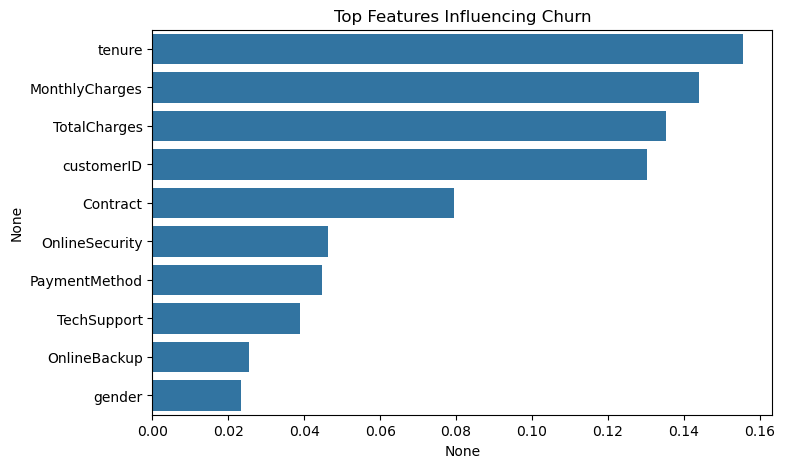

In [16]:
# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.head(10), y=feat_imp.head(10).index)
plt.title("Top Features Influencing Churn")
plt.show()

In [19]:
from scipy import stats

In [18]:
# Simulate A/B groups
np.random.seed(42)
n = 1000
control_churn = np.random.binomial(1, 0.27, n)   # 27% churn rate baseline
treatment_churn = np.random.binomial(1, 0.21, n) # treatment reduces churn to 21%


In [20]:
# Calculate retention rates
control_retention = 1 - control_churn.mean()
treatment_retention = 1 - treatment_churn.mean()

In [21]:
# Chi-square test
table = np.array([[np.sum(control_churn==0), np.sum(control_churn==1)],
                  [np.sum(treatment_churn==0), np.sum(treatment_churn==1)]])
chi2, p, _, _ = stats.chi2_contingency(table)

In [22]:
print("Control Retention Rate:", round(control_retention*100,2), "%")
print("Treatment Retention Rate:", round(treatment_retention*100,2), "%")
print("Lift in Retention:", round((treatment_retention - control_retention)*100,2), "%")
print("Chi-square p-value:", round(p,4))

Control Retention Rate: 73.9 %
Treatment Retention Rate: 78.5 %
Lift in Retention: 4.6 %
Chi-square p-value: 0.0181
